# Loan Application Status Prediction

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [2]:
df =  pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
df.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


# EDA (Exploratory Data Analysis)

In [5]:
df.shape

(614, 13)

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df.columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df.isnull().sum().sum()

149

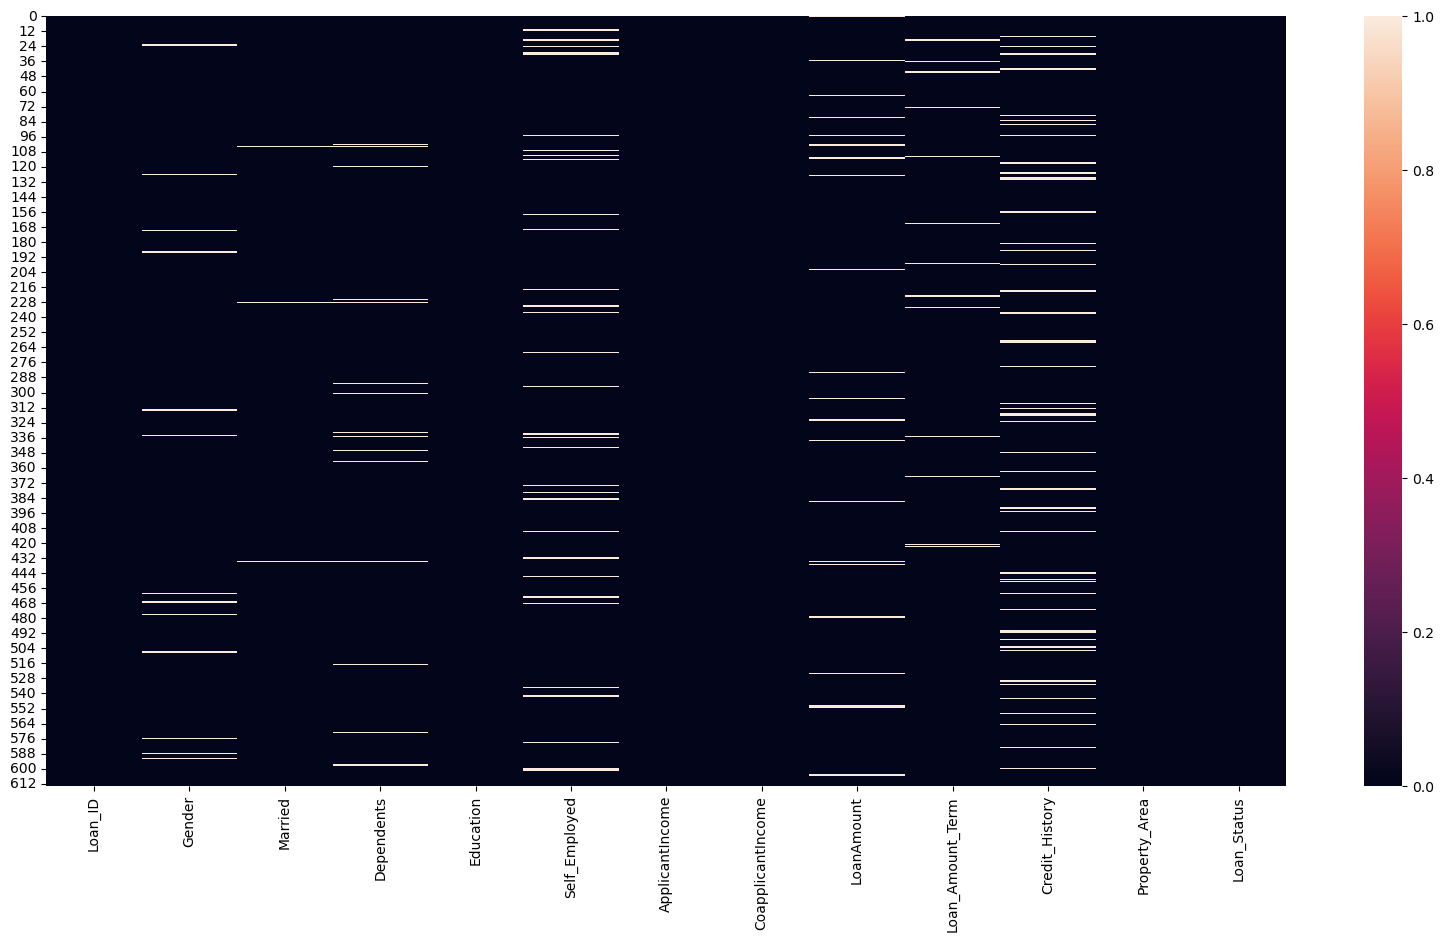

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())
plt.show()

we can see this there is lot of null values present in the Dataset so firstly we have to settel these values then move forward

In [12]:
df.replace(np.nan,0, inplace = True)
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


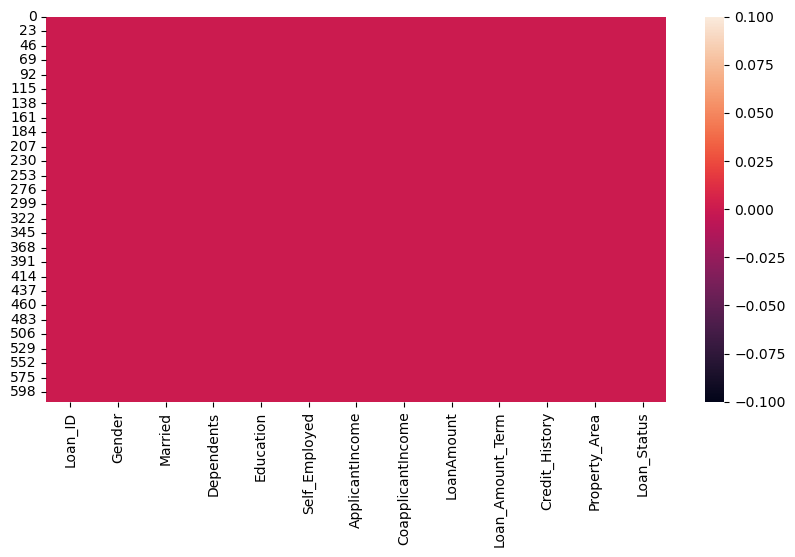

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())
plt.show()

now there is no null value 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [15]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,141.166124,334.201954,0.773616
std,6109.041673,2926.248369,88.340630,82.183884,0.418832
min,150.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,98.000000,360.000000,1.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


# Data Visualization

In [30]:
category=['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']
for i in category:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Gender
Male      489
Female    112
0          13
Name: Gender, dtype: int64
Married
Yes    398
No     213
0        3
Name: Married, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
0      15
Name: Dependents, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Self_Employed
No     500
Yes     82
0       32
Name: Self_Employed, dtype: int64
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
0.0       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Credit_History
1.0    475
0.0    139
Name: Credit_History, dtype: int64
Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64


In [69]:
clean_data = {'Gender': {'Male' : 0 , 'Female' : 1} ,
                 'Married': {'No': 0 , 'Yes' : 1},
              'Education': {'Not Graduate': 0 , 'Graduate' : 1},
              'Self_Employed': {'No': 0 , 'Yes' : 1},
              'Property_Area': {'Semiurban': 0 , 'Urban' : 1,'Rural':2},
              'Loan_Status': {'N': 0 , 'Y' : 1},
              'Dependents': {'0': 0 , '1' : 1, '2' : 2,'3+':3},
             }
df.replace(clean_data,inplace=True)

In [36]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,0.0,360.0,1.0,1,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1


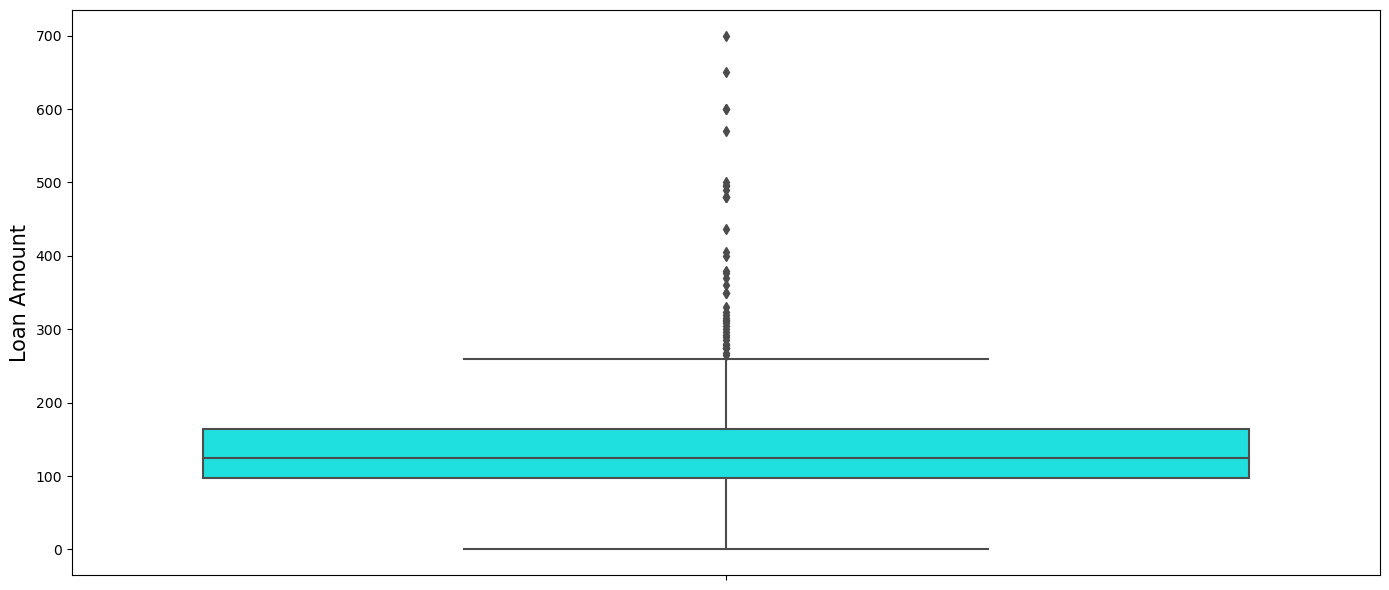

In [37]:
plt.figure(figsize=(14,6))
sns.boxplot( y='LoanAmount', data=df,color='cyan')
plt.ylabel('Loan Amount',fontsize=15)
plt.tight_layout()
plt.show()

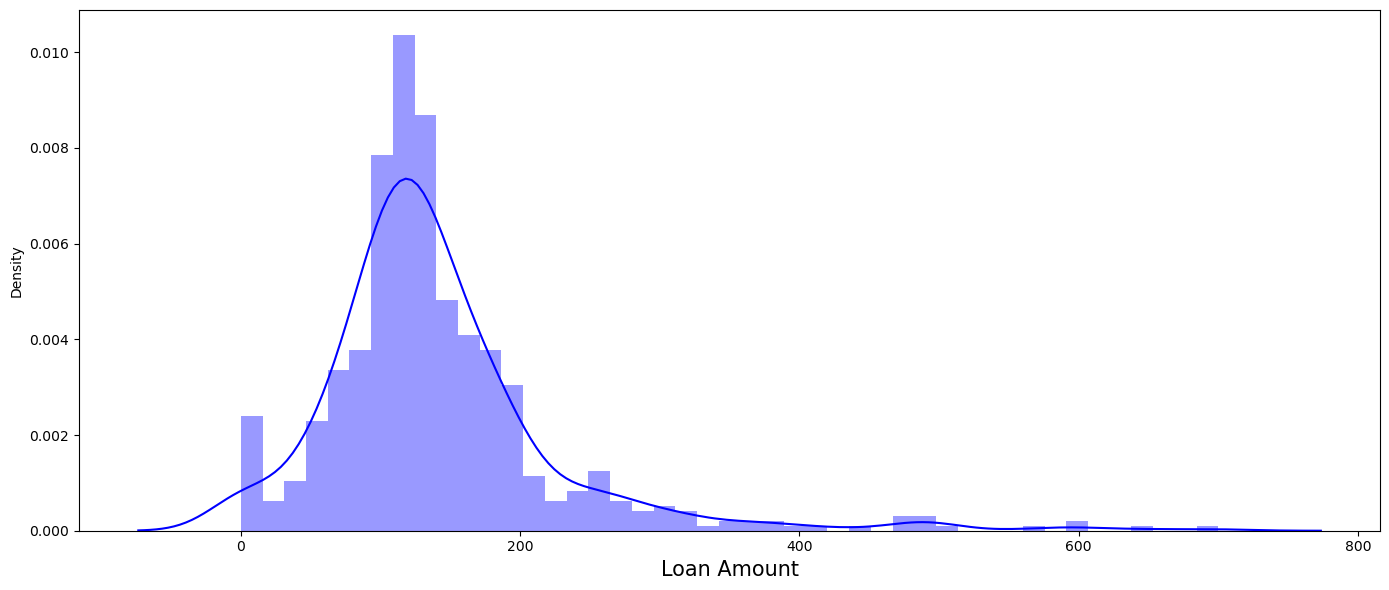

In [38]:
plt.figure(figsize=(14,6))
sns.distplot(df['LoanAmount'], color='b')
plt.xlabel('Loan Amount',fontsize=15)
plt.tight_layout()
plt.show()

1    422
0    192
Name: Loan_Status, dtype: int64


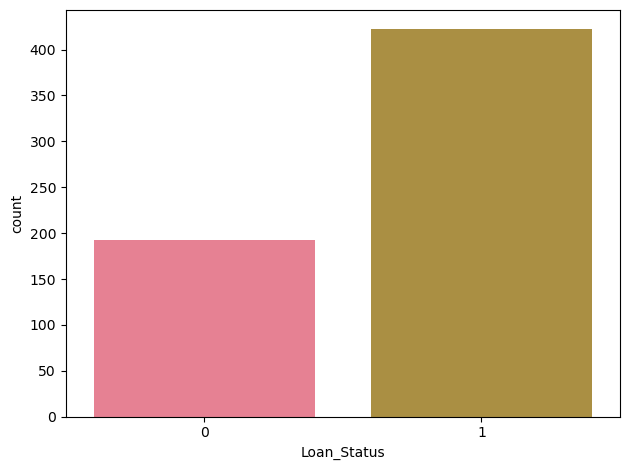

In [40]:
sns.countplot(x='Loan_Status',data=df)
print(df['Loan_Status'].value_counts())

0    502
1    112
Name: Gender, dtype: int64


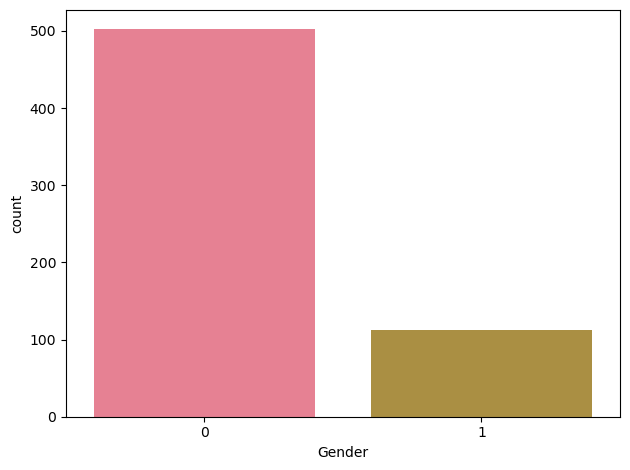

In [41]:
sns.countplot(x='Gender',data=df)
print(df['Gender'].value_counts())

0    345
1    102
2    101
3     51
0     15
Name: Dependents, dtype: int64


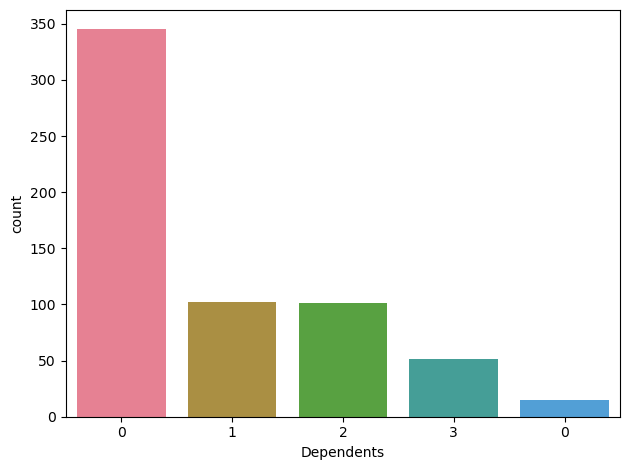

In [42]:
sns.countplot(x='Dependents',data=df)
print(df['Dependents'].value_counts())

1    480
0    134
Name: Education, dtype: int64


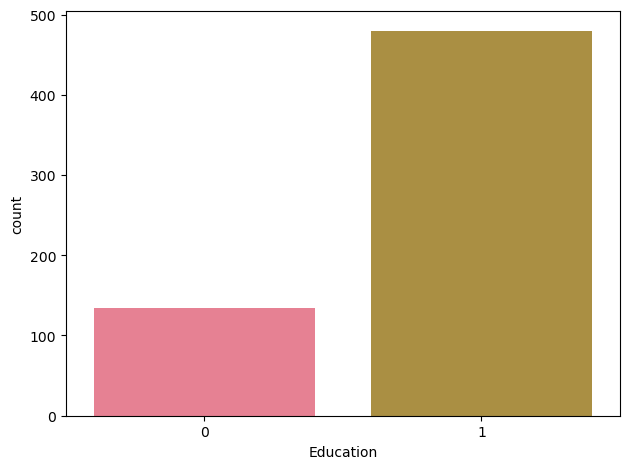

In [43]:
sns.countplot(x='Education',data=df)
print(df['Education'].value_counts())

1    398
0    216
Name: Married, dtype: int64


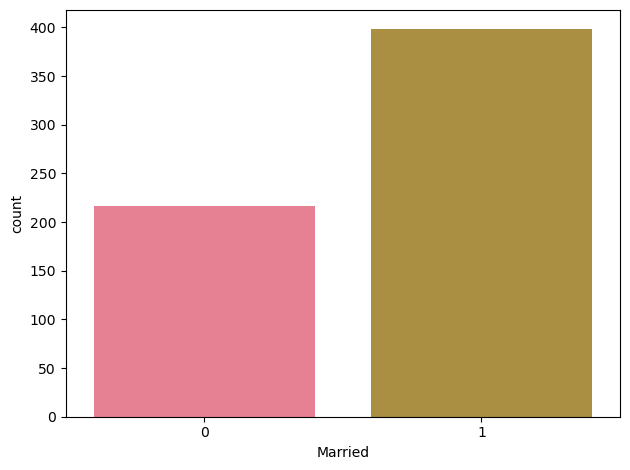

In [44]:
sns.countplot(x='Married',data=df)
print(df['Married'].value_counts())

360.0    512
180.0     44
480.0     15
0.0       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


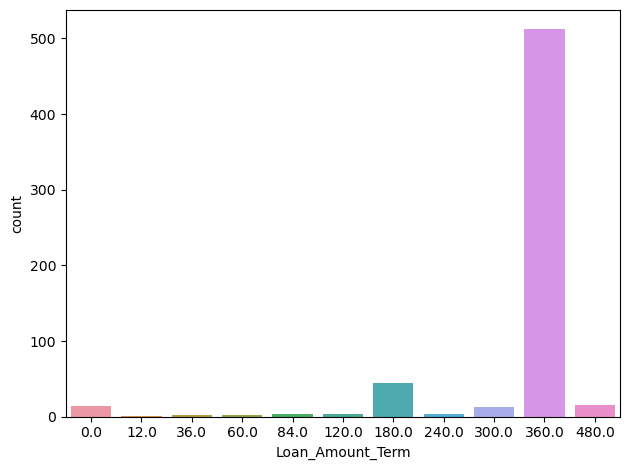

In [45]:
sns.countplot(x='Loan_Amount_Term',data=df)
print(df['Loan_Amount_Term'].value_counts())

0    532
1     82
Name: Self_Employed, dtype: int64


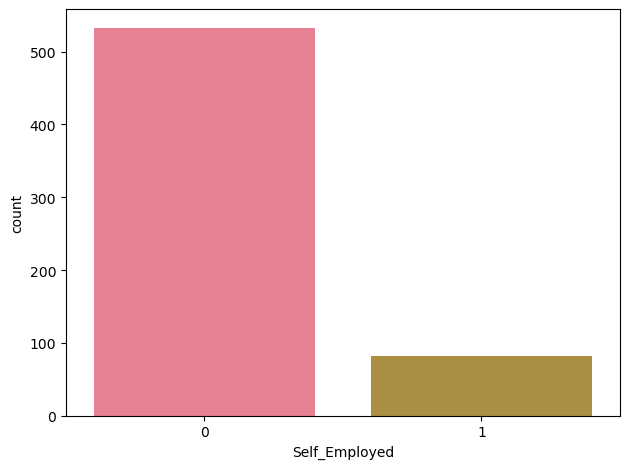

In [46]:
sns.countplot(x='Self_Employed',data=df)
print(df['Self_Employed'].value_counts())

0    233
1    202
2    179
Name: Property_Area, dtype: int64


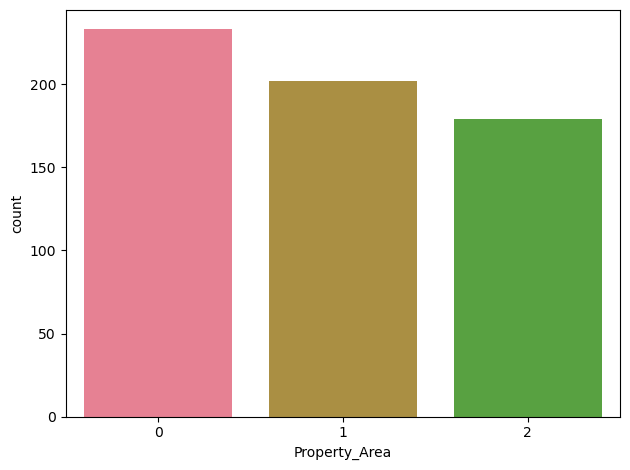

In [47]:
sns.countplot(x='Property_Area',data=df)
print(df['Property_Area'].value_counts())

1.0    475
0.0    139
Name: Credit_History, dtype: int64


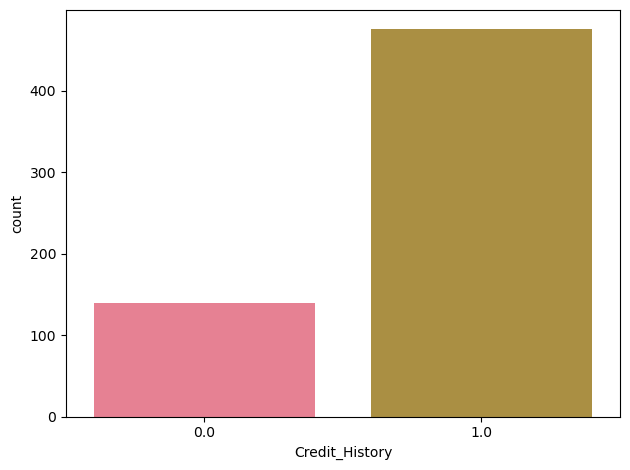

In [48]:
sns.countplot(x='Credit_History',data=df)
print(df['Credit_History'].value_counts())

# Gender Vs Loan Status

Text(0.5, 1.0, 'Gender Vs Loan Status')

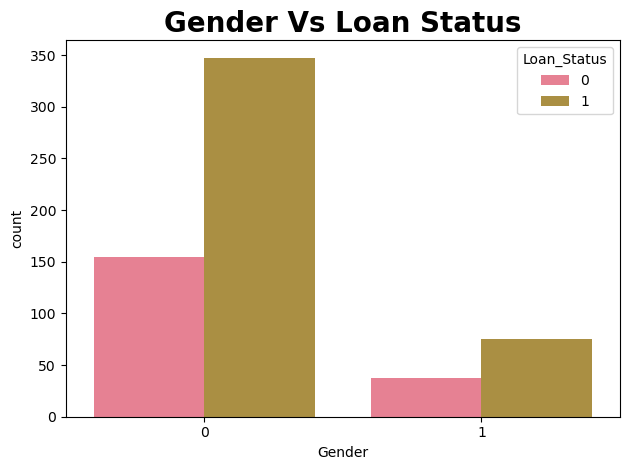

In [54]:

sns.countplot(x='Gender',hue="Loan_Status",data=df)
plt.title('Gender Vs Loan Status',fontsize=20,fontweight ='bold')


In [55]:
pd.crosstab(df['Gender'],df["Loan_Status"], margins=True).style.background_gradient(cmap='summer_r')

Loan_Status,0,1,All
Gender,,,
0,155,347,502
1,37,75,112
All,192,422,614


# Married Vs Loan Status

Text(0.5, 1.0, 'Married Vs Loan Status')

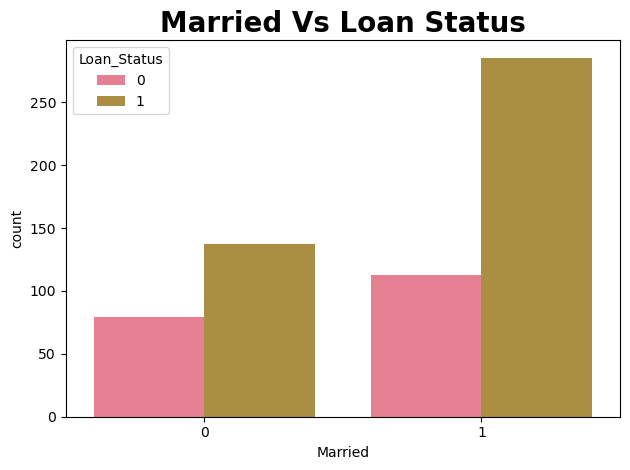

In [56]:
sns.countplot(x='Married',hue="Loan_Status",data=df)
plt.title('Married Vs Loan Status',fontsize=20,fontweight ='bold')


In [57]:
pd.crosstab(df['Married'],df["Loan_Status"], margins=True).style.background_gradient(cmap='summer_r')

Loan_Status,0,1,All
Married,,,
0,79,137,216
1,113,285,398
All,192,422,614


# Dependents VS Loan Status

Text(0.5, 1.0, 'No. of Dependents Vs Loan Status')

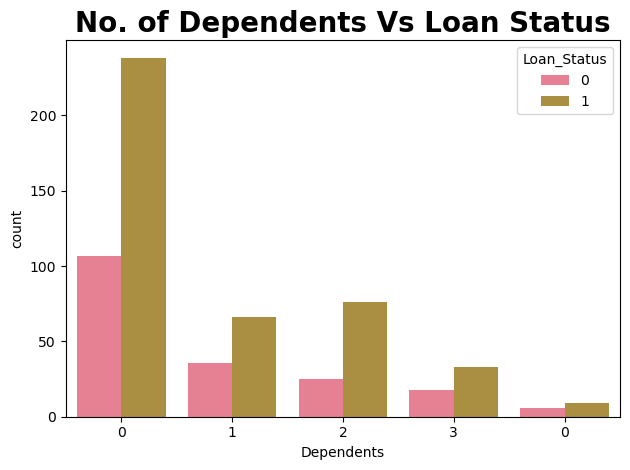

In [60]:
sns.countplot(x='Dependents',hue="Loan_Status",data=df)
plt.title('No. of Dependents Vs Loan Status',fontsize=20,fontweight ='bold')


In [59]:
pd.crosstab(df['Dependents'],df["Loan_Status"], margins=True).style.background_gradient(cmap='summer_r')

Loan_Status,0,1,All
Dependents,,,
0,6,9,15
3,18,33,51
0,107,238,345
1,36,66,102
2,25,76,101
All,192,422,614


# Education VS Loan Status

Text(0.5, 1.0, 'Education Vs Loan Status')

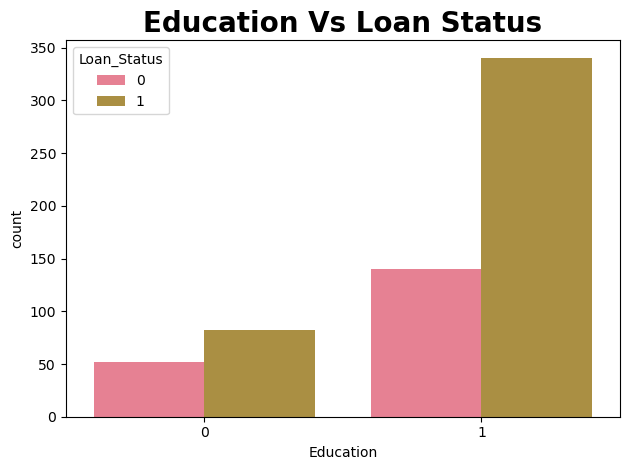

In [61]:
sns.countplot(x='Education',hue="Loan_Status",data=df)
plt.title('Education Vs Loan Status',fontsize=20,fontweight ='bold')


In [62]:
pd.crosstab(df['Education'],df["Loan_Status"], margins=True).style.background_gradient(cmap='summer_r')

Loan_Status,0,1,All
Education,,,
0,52,82,134
1,140,340,480
All,192,422,614


In [63]:
pd.crosstab([df['Dependents'],df['Gender']],[df.Loan_Status],margins=True).style.background_gradient(cmap='Blues')

# Outliers Detection and Removal

In [64]:
Numerical =['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

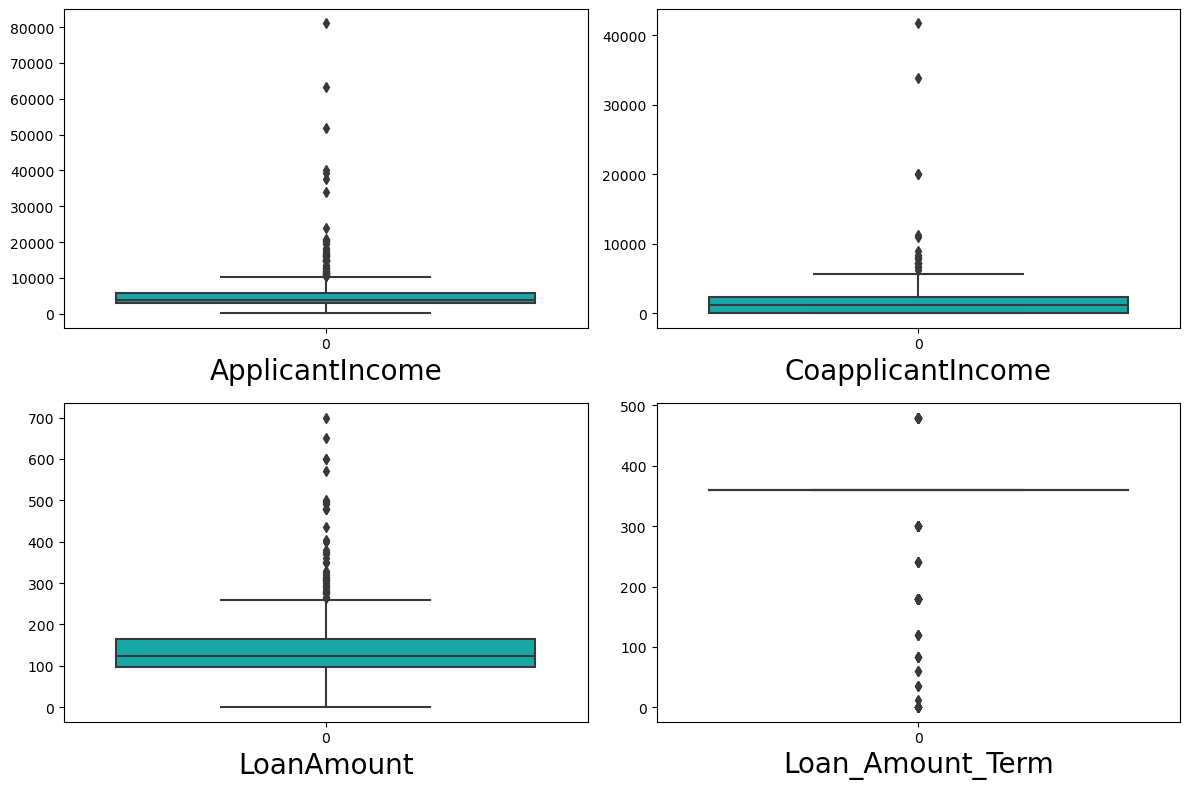

In [65]:
plt.figure(figsize=(12,8),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],color='c')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [66]:
# Droping unnecessary columns
df.drop(["Loan_ID"], axis=1, inplace=True)


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


In [86]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)
df=df1.copy()

Shape of the dataframe before removing outliers:  (614, 12)
Shape of the dataframe after removing outliers:  (571, 12)
Percentage of data loss post outlier removal:  7.0032573289902285


# Skewness of features

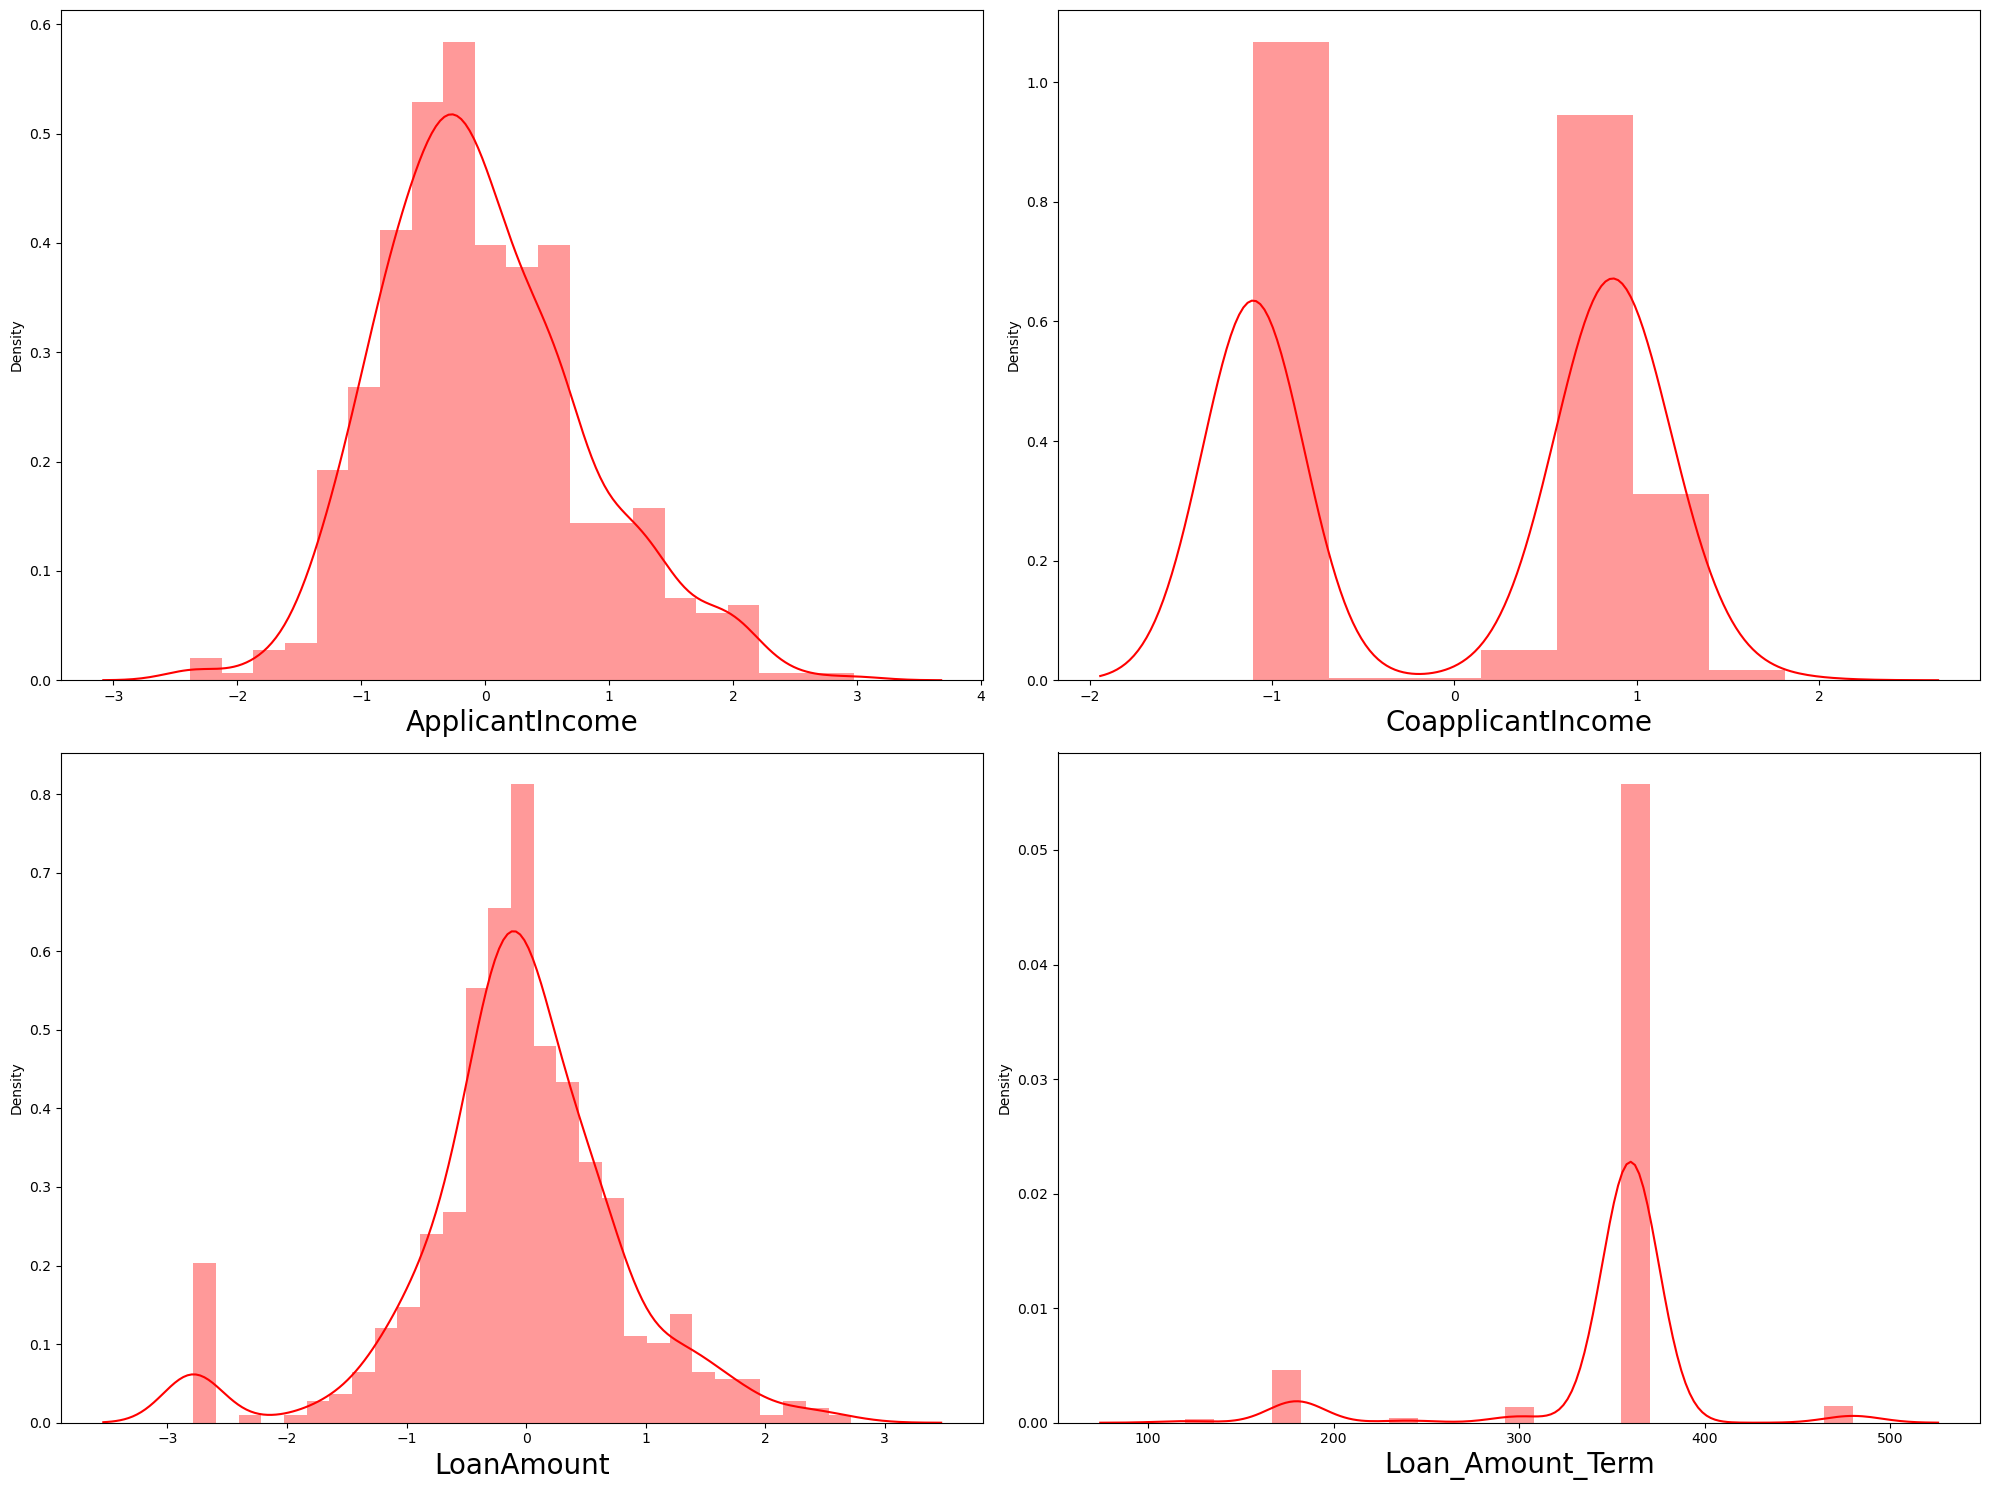

In [87]:

plt.figure(figsize=(20,15),facecolor='white')
plotnum=1
for col in Numerical:
    if plotnum<=4:
        plt.subplot(2,2,plotnum)
        sns.distplot(df[col],color='r')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [88]:
df.skew()

Gender               1.682375
Married             -0.605278
Dependents           1.014853
Education           -1.363094
Self_Employed        2.234889
ApplicantIncome      0.499315
CoapplicantIncome   -0.152536
LoanAmount          -0.588164
Loan_Amount_Term    -2.167038
Credit_History      -1.363094
Property_Area        0.175804
Loan_Status         -0.832784
dtype: float64

In [89]:
from sklearn.preprocessing import power_transform

df[['Self_Employed',"ApplicantIncome",'CoapplicantIncome','LoanAmount']]=power_transform(df[['Self_Employed',"ApplicantIncome",'CoapplicantIncome','LoanAmount']])


In [90]:
df.skew()

Gender               1.682375
Married             -0.605278
Dependents           1.014853
Education           -1.363094
Self_Employed        2.234889
ApplicantIncome     -0.046157
CoapplicantIncome   -0.112331
LoanAmount           0.017814
Loan_Amount_Term    -2.167038
Credit_History      -1.363094
Property_Area        0.175804
Loan_Status         -0.832784
dtype: float64

Now we can see this all the Skewness is removed from the Columns 

# Corrleation

In [91]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,-0.370005,-0.192473,0.058924,0.013141,-0.035869,-0.235724,-0.120211,0.101241,-0.040587,-0.097146,-0.025352
Married,-0.370005,1.000000,0.345664,-0.030433,-0.011475,-0.026092,0.322236,0.143427,-0.120699,-0.021585,0.003593,0.082633
Dependents,-0.192473,0.345664,1.000000,-0.059632,0.059391,0.116273,0.010729,0.122405,-0.075804,0.008247,0.014434,0.020732
Education,0.058924,-0.030433,-0.059632,1.000000,0.012439,0.174331,-0.045494,0.150015,0.097133,0.088448,-0.076857,0.086868
Self_Employed,0.013141,-0.011475,0.059391,0.012439,1.000000,0.188617,-0.089729,0.100220,-0.043501,-0.012928,0.005803,-0.039743
ApplicantIncome,-0.035869,-0.026092,0.116273,0.174331,0.188617,1.000000,-0.373308,0.416963,-0.024621,0.076957,0.031510,0.001485
CoapplicantIncome,-0.235724,0.322236,0.010729,-0.045494,-0.089729,-0.373308,1.000000,0.151163,0.004147,-0.032539,0.031819,0.053639
LoanAmount,-0.120211,0.143427,0.122405,0.150015,0.100220,0.416963,0.151163,1.000000,0.099946,0.000314,0.005388,0.013205
Loan_Amount_Term,0.101241,-0.120699,-0.075804,0.097133,-0.043501,-0.024621,0.004147,0.099946,1.000000,-0.005801,-0.038375,-0.036711
Credit_History,-0.040587,-0.021585,0.008247,0.088448,-0.012928,0.076957,-0.032539,0.000314,-0.005801,1.000000,-0.035372,0.435400


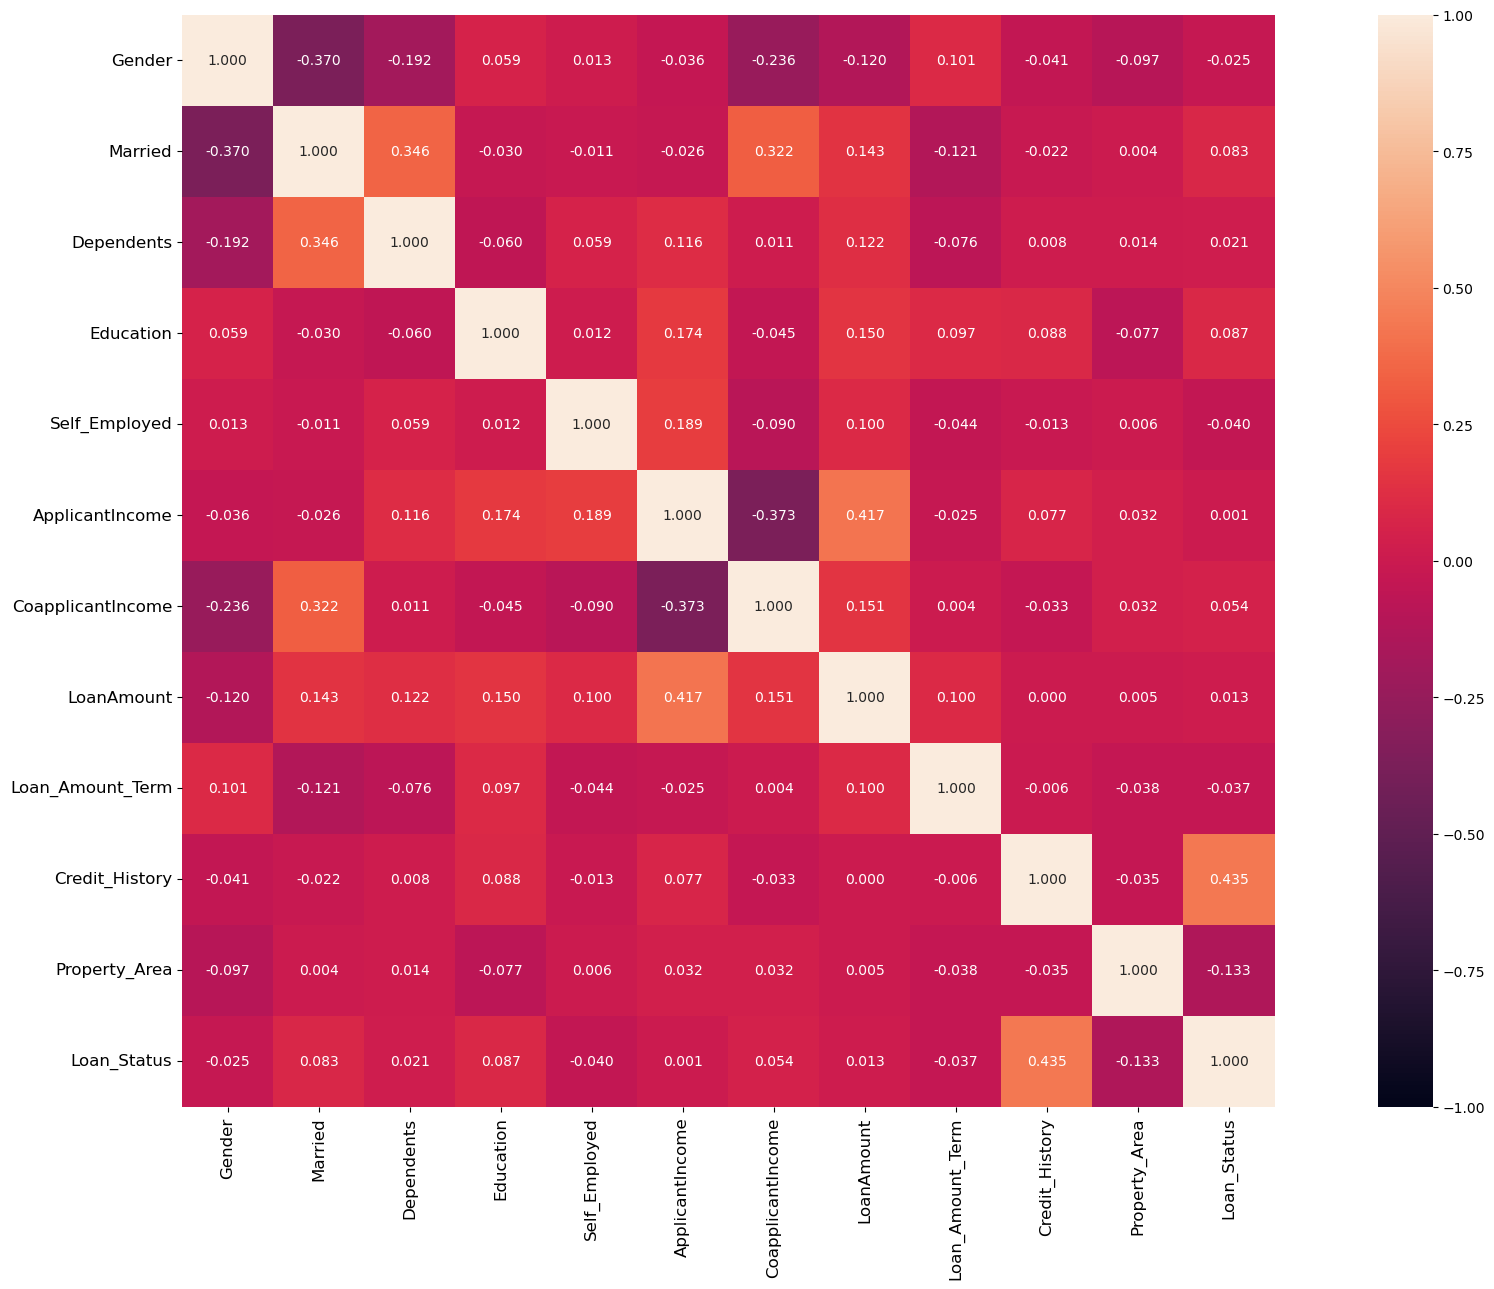

In [92]:
plt.figure(figsize=(21,13))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Checking Multicollinearity between features using variance_inflation_factor

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,1.479283,Gender
1,3.671563,Married
2,1.810557,Dependents
3,4.762386,Education
4,1.042302,Self_Employed
5,1.679978,ApplicantIncome
6,1.522981,CoapplicantIncome
7,1.417945,LoanAmount
8,10.553405,Loan_Amount_Term
9,5.573976,Credit_History


All features VIF is within permissible limit of 10.

So No Need to Worry About Multicollinearity.

In [94]:
df.Loan_Status.value_counts()

1    395
0    176
Name: Loan_Status, dtype: int64

# Balance the Imbalanced cell using Smote Method

In [98]:
from imblearn.over_sampling import SMOTE

# Splitting data in target and dependent feature
x = df.drop(['Loan_Status'], axis =1)
y = df['Loan_Status']

In [99]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
x, y = oversample.fit_resample(X, Y)

In [101]:
y.value_counts()

1    395
0    395
Name: Loan_Status, dtype: int64

We have successfully balanced the imbalance cells 

# Standard Scaling

In [102]:

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x = scaler.fit_transform(x)

# Machine Learning Model Building

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=99, test_size=.3)
print('Training feature matrix size:',x_train.shape)
print('Training target vector size:',y_train.shape)
print('Test feature matrix size:',x_test.shape)
print('Test target vector size:',y_test.shape)

Training feature matrix size: (553, 11)
Training target vector size: (553,)
Test feature matrix size: (237, 11)
Test target vector size: (237,)


# Finding best Random state

In [105]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(x_train,y_train)
    y_pred=log_reg.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.7805907172995781 on Random_state 50


# Logistic Regression

In [106]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.7540687160940326


Classification ML Algorithm Evaluation Matrix ExtraTreesClassifier() is


Accuracy Score : 0.7637130801687764


Confusion matrix :
 [[97 32]
 [24 84]]


Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.75      0.78       129
           1       0.72      0.78      0.75       108

    accuracy                           0.76       237
   macro avg       0.76      0.76      0.76       237
weighted avg       0.77      0.76      0.76       237





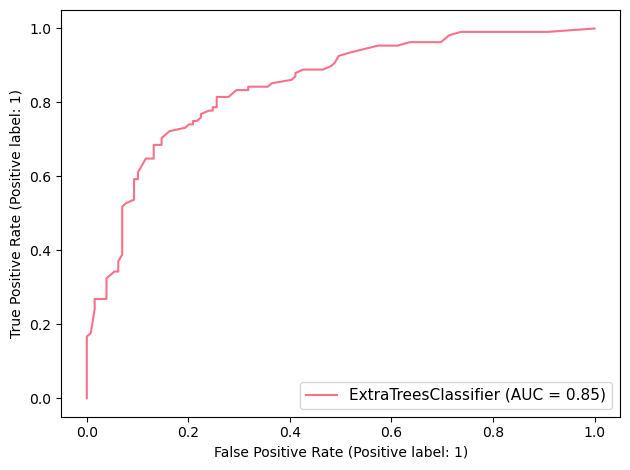

In [125]:
print('Classification ML Algorithm Evaluation Matrix for Logistic Regression is' )
print('\n')
print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix :'+'\n',confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report :'+'\n',classification_report(y_test, y_pred))
print('\n')
disp = plot_roc_curve(m,x_test,y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.show()

# SVC Model

Classification ML Algorithm Evaluation Matrix ExtraTreesClassifier() is


Accuracy Score :
 0.7637130801687764


Confusion matrix : 
 [[97 32]
 [24 84]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.75      0.78       129
           1       0.72      0.78      0.75       108

    accuracy                           0.76       237
   macro avg       0.76      0.76      0.76       237
weighted avg       0.77      0.76      0.76       237





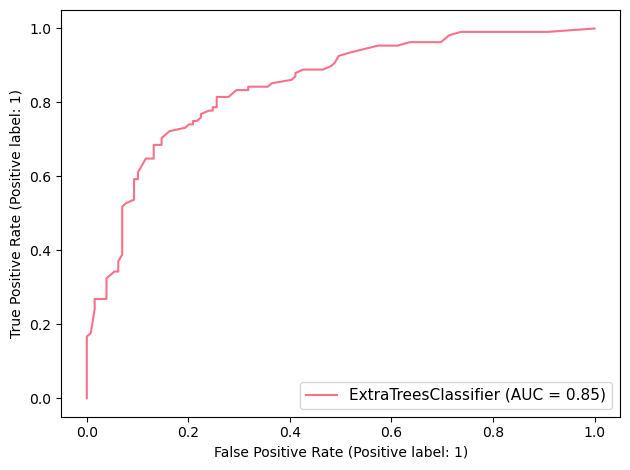

In [109]:
svc = SVC()
svc.fit(x_train,y_train)
y_pred=m.predict(x_test)
print('Classification ML Algorithm Evaluation Matrix SVC Model is' )
print('\n')
print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix :'+'\n',confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report :'+'\n',classification_report(y_test, y_pred))
print('\n')
disp = plot_roc_curve(m,x_test,y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.show()
print('============================================================================================================')

# By Using GaussianNB() Model

Classification ML Algorithm Evaluation Matrix ExtraTreesClassifier() is


Accuracy Score :
 0.7637130801687764


Confusion matrix : 
 [[97 32]
 [24 84]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.75      0.78       129
           1       0.72      0.78      0.75       108

    accuracy                           0.76       237
   macro avg       0.76      0.76      0.76       237
weighted avg       0.77      0.76      0.76       237





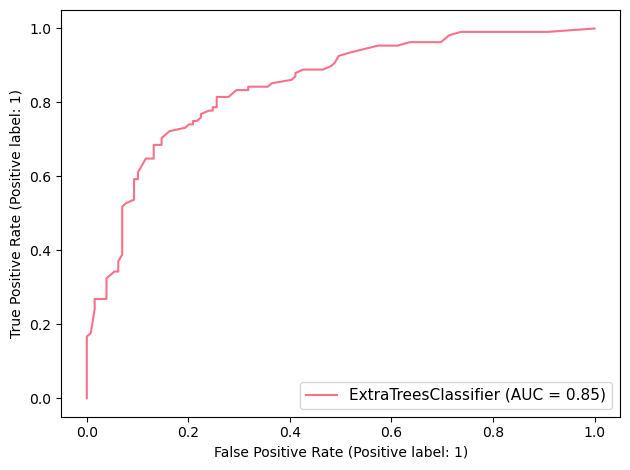

In [110]:
GNB =GaussianNB()
GNB.fit(x_train,y_train)
y_pred=m.predict(x_test)
print('Classification ML Algorithm Evaluation Matrix for GaussianNB is' )
print('\n')
print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix :'+'\n',confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report :'+'\n',classification_report(y_test, y_pred))
print('\n')
disp = plot_roc_curve(m,x_test,y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.show()
print('============================================================================================================')

# By Using DecisionTreeClassifier()

Classification ML Algorithm Evaluation Matrix ExtraTreesClassifier() is


Accuracy Score :
 0.7637130801687764


Confusion matrix : 
 [[97 32]
 [24 84]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.75      0.78       129
           1       0.72      0.78      0.75       108

    accuracy                           0.76       237
   macro avg       0.76      0.76      0.76       237
weighted avg       0.77      0.76      0.76       237





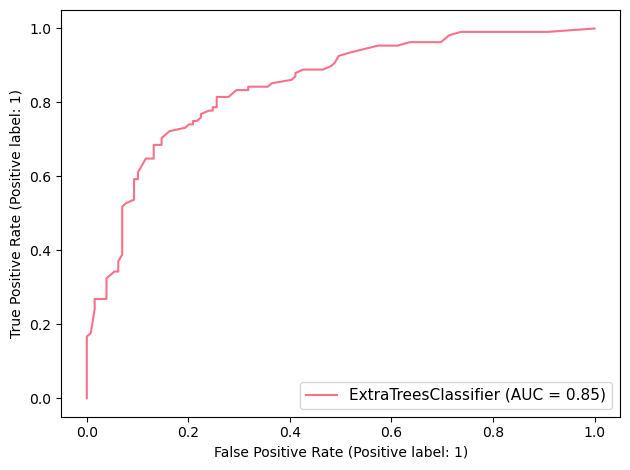

In [111]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred=m.predict(x_test)
print('Classification ML Algorithm Evaluation Matrix for Decision Tree Classifier is' )
print('\n')
print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix :'+'\n',confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report :'+'\n',classification_report(y_test, y_pred))
print('\n')
disp = plot_roc_curve(m,x_test,y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.show()
print('============================================================================================================')

# By Using KNeighborsClassifier

Classification ML Algorithm Evaluation Matrix ExtraTreesClassifier() is


Accuracy Score :
 0.7637130801687764


Confusion matrix : 
 [[97 32]
 [24 84]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.75      0.78       129
           1       0.72      0.78      0.75       108

    accuracy                           0.76       237
   macro avg       0.76      0.76      0.76       237
weighted avg       0.77      0.76      0.76       237





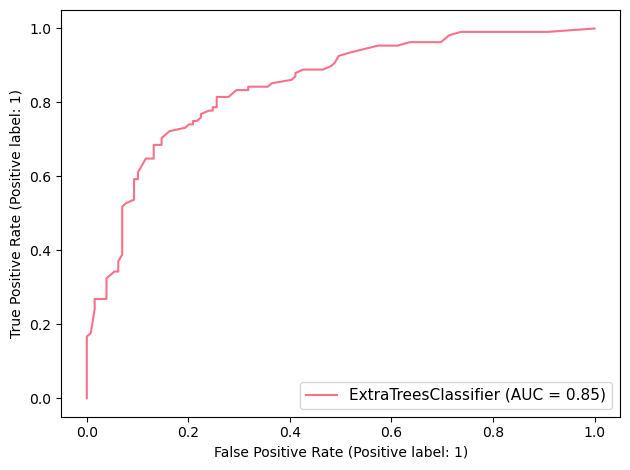

In [112]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
y_pred=m.predict(x_test)
print('Classification ML Algorithm Evaluation Matrix for KNeighborsClassifier is' )
print('\n')
print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix :'+'\n',confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report :'+'\n',classification_report(y_test, y_pred))
print('\n')
disp = plot_roc_curve(m,x_test,y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.show()
print('============================================================================================================')

# By Using RandomForestClassifier

Classification ML Algorithm Evaluation Matrix ExtraTreesClassifier() is


Accuracy Score :
 0.7637130801687764


Confusion matrix : 
 [[97 32]
 [24 84]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.75      0.78       129
           1       0.72      0.78      0.75       108

    accuracy                           0.76       237
   macro avg       0.76      0.76      0.76       237
weighted avg       0.77      0.76      0.76       237





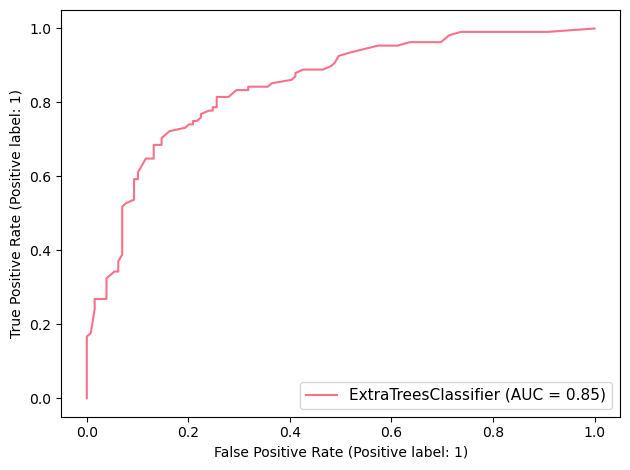

In [113]:
rfc =  RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=m.predict(x_test)
print('Classification ML Algorithm Evaluation Matrix RandomForestClassifier is' )
print('\n')
print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix :'+'\n',confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report :'+'\n',classification_report(y_test, y_pred))
print('\n')
disp = plot_roc_curve(m,x_test,y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.show()
print('============================================================================================================')

# By Using ExtraTreesClassifier

Classification ML Algorithm Evaluation Matrix ExtraTreesClassifier() is


Accuracy Score : 0.7637130801687764


Confusion matrix :
 [[97 32]
 [24 84]]


Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.75      0.78       129
           1       0.72      0.78      0.75       108

    accuracy                           0.76       237
   macro avg       0.76      0.76      0.76       237
weighted avg       0.77      0.76      0.76       237





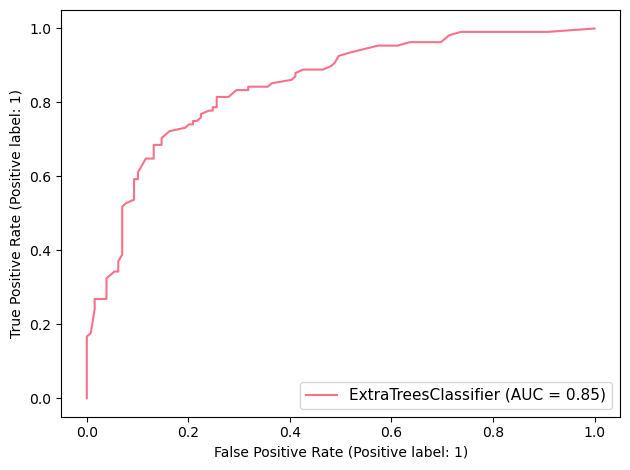

In [124]:
ETC =  ExtraTreesClassifier()
ETC.fit(x_train,y_train)
y_pred=m.predict(x_test)
print('Classification ML Algorithm Evaluation Matrix for ExtraTreesClassifier is' )
print('\n')
print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix :'+'\n',confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report :'+'\n',classification_report(y_test, y_pred))
print('\n')
disp = plot_roc_curve(m,x_test,y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.show()
print('============================================================================================================')

# Cross Validation Score 

In [115]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=5))
    return(rmse)


models =[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]


names = ['LR','svc','GNB','dtc','knn','rfc','ETC']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))


LR    : 0.268354, 0.031671
svc    : 0.243038, 0.032173
GNB    : 0.292405, 0.032863
dtc    : 0.253165, 0.052650
knn    : 0.250633, 0.036818
rfc    : 0.200000, 0.046784
ETC    : 0.218987, 0.037678


# Hyper Parameter Tunning Using Grid Search CV

In [116]:
from sklearn.model_selection import GridSearchCV
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [118]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.757 total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.784 total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.793 total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.718 total time=   0.0s
[CV 5

[CV 1/5; 9/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10;, score=0.766 total time=   0.0s
[CV 2/5; 9/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10
[CV 2/5; 9/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10;, score=0.793 total time=   0.0s
[CV 3/5; 9/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10
[CV 3/5; 9/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10;, score=0.784 total time=   0.0s
[CV 4/5; 9/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10
[CV 4/5; 9/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10;, score=0.718 total time=   0.0s
[CV 5/5; 9/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10
[CV 5/5; 9/168] END bootstrap=True, criterion=gini, max_dept

[CV 2/5; 17/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=15;, score=0.766 total time=   0.0s
[CV 3/5; 17/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=15
[CV 3/5; 17/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=15;, score=0.802 total time=   0.0s
[CV 4/5; 17/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=15
[CV 4/5; 17/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=15;, score=0.782 total time=   0.0s
[CV 5/5; 17/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=15
[CV 5/5; 17/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=15;, score=0.755 total time=   0.0s
[CV 1/5; 18/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=25
[CV 1/5; 18/168] END bootstrap=True, criteri

[CV 3/5; 24/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=15;, score=0.766 total time=   0.0s
[CV 4/5; 24/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=15
[CV 4/5; 24/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=15;, score=0.755 total time=   0.0s
[CV 5/5; 24/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=15
[CV 5/5; 24/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=15;, score=0.727 total time=   0.0s
[CV 1/5; 25/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=25
[CV 1/5; 25/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=25;, score=0.775 total time=   0.0s
[CV 2/5; 25/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=25
[CV 2/5; 25/168] END bootstrap=True, criteri

[CV 3/5; 31/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=15;, score=0.793 total time=   0.0s
[CV 4/5; 31/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=15
[CV 4/5; 31/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=15;, score=0.764 total time=   0.0s
[CV 5/5; 31/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=15
[CV 5/5; 31/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=15;, score=0.745 total time=   0.0s
[CV 1/5; 32/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=25
[CV 1/5; 32/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=25;, score=0.748 total time=   0.0s
[CV 2/5; 32/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=25
[CV 2/5; 32/168] END bootstrap=True, criteri

[CV 2/5; 39/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=25;, score=0.829 total time=   0.0s
[CV 3/5; 39/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=25
[CV 3/5; 39/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=25;, score=0.802 total time=   0.0s
[CV 4/5; 39/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=25
[CV 4/5; 39/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=25;, score=0.791 total time=   0.0s
[CV 5/5; 39/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=25
[CV 5/5; 39/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=25;, score=0.745 total time=   0.0s
[CV 1/5; 40/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=50
[CV 1/5; 40/168] END bootstrap=True, criteri

[CV 4/5; 46/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=25;, score=0.800 total time=   0.0s
[CV 5/5; 46/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=25
[CV 5/5; 46/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=25;, score=0.755 total time=   0.0s
[CV 1/5; 47/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=50
[CV 1/5; 47/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=50;, score=0.766 total time=   0.0s
[CV 2/5; 47/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=50
[CV 2/5; 47/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=50;, score=0.802 total time=   0.0s
[CV 3/5; 47/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=50
[CV 3/5; 47/168] END bootstrap=True, criteri

[CV 4/5; 53/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=25;, score=0.773 total time=   0.0s
[CV 5/5; 53/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=25
[CV 5/5; 53/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=25;, score=0.782 total time=   0.0s
[CV 1/5; 54/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=50
[CV 1/5; 54/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=50;, score=0.739 total time=   0.0s
[CV 2/5; 54/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=50
[CV 2/5; 54/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=50;, score=0.784 total time=   0.0s
[CV 3/5; 54/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=50
[CV 3/5; 54/168] END bootstrap=True, criteri

[CV 1/5; 61/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=50;, score=0.775 total time=   0.0s
[CV 2/5; 61/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=50
[CV 2/5; 61/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=50;, score=0.802 total time=   0.0s
[CV 3/5; 61/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=50
[CV 3/5; 61/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=50;, score=0.820 total time=   0.0s
[CV 4/5; 61/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=50
[CV 4/5; 61/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=50;, score=0.764 total time=   0.0s
[CV 5/5; 61/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=50
[CV 5/5; 61/168] END bootstrap=True, criteri

[CV 3/5; 68/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=50;, score=0.811 total time=   0.0s
[CV 4/5; 68/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=50
[CV 4/5; 68/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=50;, score=0.773 total time=   0.0s
[CV 5/5; 68/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=50
[CV 5/5; 68/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=50;, score=0.755 total time=   0.0s
[CV 1/5; 69/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=60
[CV 1/5; 69/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=60;, score=0.757 total time=   0.0s
[CV 2/5; 69/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=60
[CV 2/5; 69/168] END bootstrap=True, criteri

[CV 4/5; 75/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=50;, score=0.791 total time=   0.0s
[CV 5/5; 75/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=50
[CV 5/5; 75/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=50;, score=0.745 total time=   0.0s
[CV 1/5; 76/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=60
[CV 1/5; 76/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=60;, score=0.811 total time=   0.0s
[CV 2/5; 76/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=60
[CV 2/5; 76/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=60;, score=0.820 total time=   0.0s
[CV 3/5; 76/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=60
[CV 3/5; 76/168] END bootstrap=True, criteri

[CV 5/5; 82/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=50;, score=0.764 total time=   0.0s
[CV 1/5; 83/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=60
[CV 1/5; 83/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=60;, score=0.775 total time=   0.0s
[CV 2/5; 83/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=60
[CV 2/5; 83/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=60;, score=0.784 total time=   0.0s
[CV 3/5; 83/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=60
[CV 3/5; 83/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=60;, score=0.838 total time=   0.0s
[CV 4/5; 83/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=60
[CV 4/5; 83/168] END bootstrap=True, criteri

[CV 4/5; 89/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=50;, score=0.700 total time=   0.0s
[CV 5/5; 89/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=50
[CV 5/5; 89/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=50;, score=0.727 total time=   0.0s
[CV 1/5; 90/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=60
[CV 1/5; 90/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=60;, score=0.766 total time=   0.0s
[CV 2/5; 90/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=60
[CV 2/5; 90/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=60;, score=0.766 total time=   0.0s
[CV 3/5; 90/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=60
[CV 3/5; 90/168] END bootstr

[CV 3/5; 96/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=50;, score=0.775 total time=   0.0s
[CV 4/5; 96/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=50
[CV 4/5; 96/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=50;, score=0.727 total time=   0.0s
[CV 5/5; 96/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=50
[CV 5/5; 96/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=50;, score=0.727 total time=   0.0s
[CV 1/5; 97/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=60
[CV 1/5; 97/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=60;, score=0.748 total time=   0.0s
[CV 2/5; 97/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=60
[CV 2/5; 97/168] END bootstr

[CV 4/5; 103/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50;, score=0.755 total time=   0.0s
[CV 5/5; 103/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50
[CV 5/5; 103/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50;, score=0.755 total time=   0.0s
[CV 1/5; 104/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=60
[CV 1/5; 104/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=60;, score=0.775 total time=   0.0s
[CV 2/5; 104/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=60
[CV 2/5; 104/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=60;, score=0.775 total time=   0.0s
[CV 3/5; 104/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=60
[CV 3/5; 104

[CV 4/5; 110/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=50;, score=0.755 total time=   0.0s
[CV 5/5; 110/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=50
[CV 5/5; 110/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=50;, score=0.773 total time=   0.0s
[CV 1/5; 111/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=60
[CV 1/5; 111/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=60;, score=0.766 total time=   0.0s
[CV 2/5; 111/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=60
[CV 2/5; 111/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=60;, score=0.793 total time=   0.0s
[CV 3/5; 111/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=60
[CV 3/5; 111

[CV 4/5; 117/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=50;, score=0.755 total time=   0.0s
[CV 5/5; 117/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=50
[CV 5/5; 117/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=50;, score=0.745 total time=   0.0s
[CV 1/5; 118/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=60
[CV 1/5; 118/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=60;, score=0.784 total time=   0.0s
[CV 2/5; 118/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=60
[CV 2/5; 118/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=60;, score=0.793 total time=   0.0s
[CV 3/5; 118/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=60
[CV 3/5; 118

[CV 5/5; 124/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=50;, score=0.782 total time=   0.0s
[CV 1/5; 125/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=60
[CV 1/5; 125/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=60;, score=0.784 total time=   0.0s
[CV 2/5; 125/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=60
[CV 2/5; 125/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=60;, score=0.775 total time=   0.0s
[CV 3/5; 125/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=60
[CV 3/5; 125/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=60;, score=0.802 total time=   0.0s
[CV 4/5; 125/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=60
[CV 4/5; 125

[CV 5/5; 131/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50;, score=0.745 total time=   0.0s
[CV 1/5; 132/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=60
[CV 1/5; 132/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=60;, score=0.793 total time=   0.0s
[CV 2/5; 132/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=60
[CV 2/5; 132/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=60;, score=0.802 total time=   0.0s
[CV 3/5; 132/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=60
[CV 3/5; 132/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=60;, score=0.820 total time=   0.0s
[CV 4/5; 132/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=60
[CV 4/5; 132

[CV 1/5; 139/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=60;, score=0.784 total time=   0.0s
[CV 2/5; 139/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=60
[CV 2/5; 139/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=60;, score=0.784 total time=   0.0s
[CV 3/5; 139/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=60
[CV 3/5; 139/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=60;, score=0.811 total time=   0.0s
[CV 4/5; 139/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=60
[CV 4/5; 139/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=60;, score=0.764 total time=   0.0s
[CV 5/5; 139/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=60
[CV 5/5; 139

[CV 5/5; 145/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=50;, score=0.764 total time=   0.0s
[CV 1/5; 146/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=60
[CV 1/5; 146/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=60;, score=0.784 total time=   0.0s
[CV 2/5; 146/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=60
[CV 2/5; 146/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=60;, score=0.802 total time=   0.0s
[CV 3/5; 146/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=60
[CV 3/5; 146/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=60;, score=0.811 total time=   0.0s
[CV 4/5; 146/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=60
[CV 4/5; 146

[CV 4/5; 152/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=50;, score=0.764 total time=   0.0s
[CV 5/5; 152/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=50
[CV 5/5; 152/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=50;, score=0.727 total time=   0.0s
[CV 1/5; 153/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=60
[CV 1/5; 153/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=60;, score=0.784 total time=   0.0s
[CV 2/5; 153/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=60
[CV 2/5; 153/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=60;, score=0.802 total time=   0.0s
[CV 3/5; 153/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=60
[CV 3/5; 153

[CV 4/5; 159/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=50;, score=0.764 total time=   0.0s
[CV 5/5; 159/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=50
[CV 5/5; 159/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=50;, score=0.764 total time=   0.0s
[CV 1/5; 160/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=60
[CV 1/5; 160/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=60;, score=0.784 total time=   0.0s
[CV 2/5; 160/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=60
[CV 2/5; 160/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=60;, score=0.811 total time=   0.0s
[CV 3/5; 160/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=60
[CV 3/5; 160

[CV 5/5; 166/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=50;, score=0.773 total time=   0.0s
[CV 1/5; 167/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=60
[CV 1/5; 167/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=60;, score=0.766 total time=   0.0s
[CV 2/5; 167/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=60
[CV 2/5; 167/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=60;, score=0.811 total time=   0.0s
[CV 3/5; 167/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=60
[CV 3/5; 167/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=60;, score=0.802 total time=   0.0s
[CV 4/5; 167/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=60
[CV 4/5; 167

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [119]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'log2',
 'n_estimators': 50}

# Final Model

In [121]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 50, max_depth=20 ,max_features='auto')
Final_mod.fit(x_train,y_train)
y_pred=Final_mod.predict(x_test)
print('Accuracy Score :', accuracy_score(y_test, y_pred))

Accuracy Score : 0.7890295358649789


# Saving model

In [126]:

import joblib
joblib.dump(Final_mod,'Loan_Application.pkl')

['Loan_Application.pkl']